In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

sns.set_theme(style="whitegrid")

,Spheres,Resolution,Time
0,1,400x400,0.040967
1,1,400x400,0.042850
2,1,400x400,0.039844
3,1,400x400,0.040956
4,1,400x400,0.040220
...,...,...,...
445,9,400x400,0.677014
446,9,400x400,0.687907
447,9,400x400,0.681578
448,9,400x400,0.732931


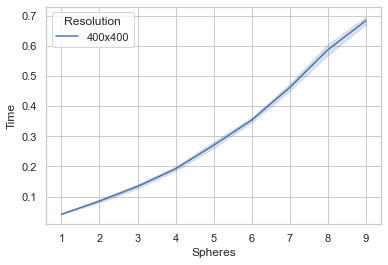

In [4]:
joined_files = os.path.join("CPU_*_400x400.csv")
joined_list = glob.glob(joined_files)
# tips2 = pd.read_csv('test1.csv')
tips2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
tips2.to_csv("CPU_400x400")
# tips2["Time"] = tips2["Time"].astype("double")
display(tips2)



ax = sns.lineplot(x="Spheres", y="Time", hue="Resolution", data=tips2)
# ax.set_yscale("log") # use log    